In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [59]:

loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')
loan_data = loan_data_backup.copy()
loan_data



,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [3]:
pd.options.display.max_columns = None

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
loan_data = loan_data.dropna(axis = 1,how = 'all')

In [6]:
missing_columns = loan_data.isnull().sum().sort_values(ascending = False)
print(missing_columns)

mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340304
mths_since_last_delinq         250351
next_pymnt_d                   227214
tot_cur_bal                     70276
total_rev_hi_lim                70276
tot_coll_amt                    70276
emp_title                       27588
emp_length                      21008
last_pymnt_d                      376
revol_util                        340
collections_12_mths_ex_med        145
last_credit_pull_d                 42
earliest_cr_line                   29
pub_rec                            29
open_acc                           29
inq_last_6mths                     29
delinq_2yrs                        29
acc_now_delinq                     29
total_acc                          29
title                              21
annual_inc                          4
loan_amnt                           0
member_id                           0
funded_amnt                         0
dti         

In [7]:
drop_columns = missing_columns.head(5).index
loan_data = loan_data.drop(columns =  drop_columns)


In [8]:
cols_to_drop = ['Unnamed: 0','id','member_id']
loan_data = loan_data.drop(columns = cols_to_drop)

In [9]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


<Axes: xlabel='count', ylabel='loan_status'>

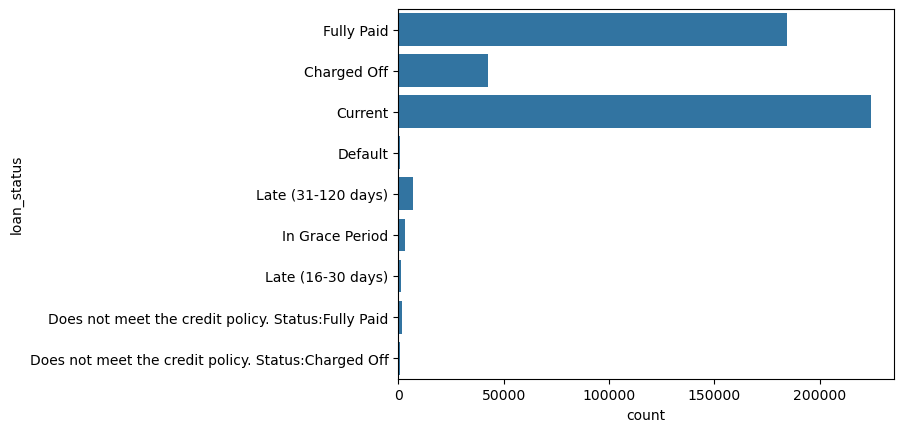

In [10]:
sns.countplot(loan_data['loan_status'])

In [11]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [12]:
def create_default_label(df,status_col = 'loan_status'):
    default_status = [
        'Charged Off',
        'Default',
        'Late (31-120 days)',
        'Late (16-30 days)',
        'Does not meet the credit policy. Status:Charged Off'      
    ]
    df['default'] = df[status_col].apply(lambda x:1 if x in default_status else 0 )
    return df

In [13]:
loan_data = create_default_label(loan_data)

In [14]:
loan_data['default'].value_counts()

default
0    414099
1     52186
Name: count, dtype: int64

In [15]:
default_rate = loan_data['default'].mean()
print('Default rate:',default_rate)

Default rate: 0.11191867634601156


In [16]:
numeric_df = loan_data.select_dtypes(include =['int64','float64'])
numeric_col = numeric_df.columns.tolist()
print("=== Numeric Columns ===")
print(numeric_col, "\n")

=== Numeric Columns ===
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default'] 



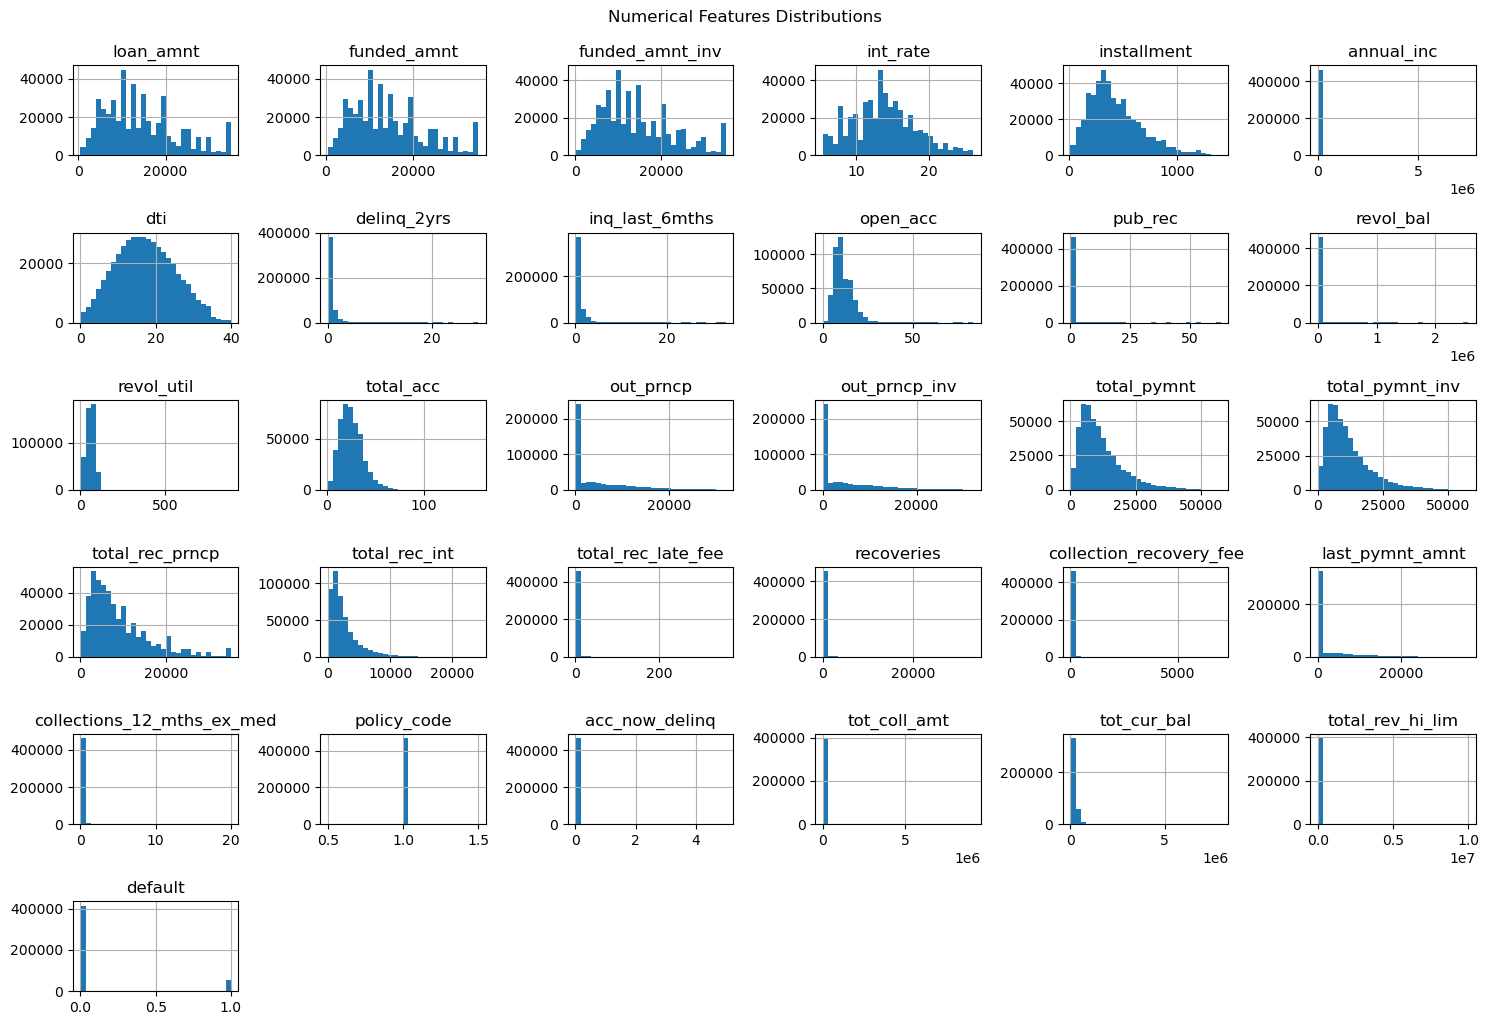

In [17]:
numeric_df.hist(figsize=(15, 10), bins=30) 
plt.tight_layout() 
plt.suptitle('Numerical Features Distributions',y=1.02)
plt.show()

In [18]:
#Romove same values columns
s_cols = []
for col in numeric_df :
    top_freq = numeric_df[col].value_counts(normalize=True, dropna=True).iloc[0]
    if top_freq > 0.95:
        s_cols.append(col)
numeric_df = numeric_df.drop(columns = s_cols)
print('Romove same value columns:',s_cols)


Romove same value columns: ['total_rec_late_fee', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq']


In [19]:
# Romove Remove Highly Correlated Variables
corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper.columns if any(upper[col] > 0.95)]
numeric_df= numeric_df.drop(columns=high_corr_cols)
numeric_cols = numeric_df.columns.tolist()
print("Removed highly correlated columns:", high_corr_cols)
print('Final numeric cols :',numeric_df[:0])
print('Numeric columns count :',numeric_df.shape[1])

Removed highly correlated columns: ['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp']
Final numeric cols : Empty DataFrame
Columns: [loan_amnt, int_rate, annual_inc, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, total_pymnt, total_rec_int, recoveries, last_pymnt_amnt, tot_coll_amt, tot_cur_bal, total_rev_hi_lim, default]
Index: []
Numeric columns count : 20


Text(0.5, 1.0, 'Numerical features corrilation heatmap')

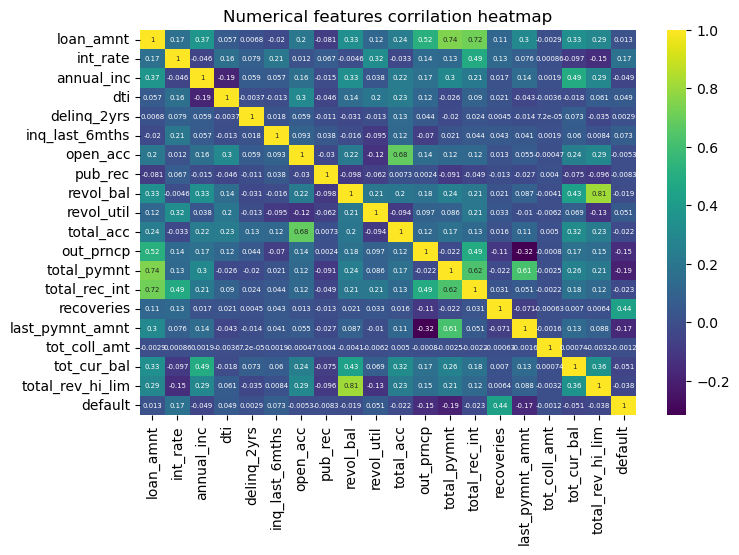

In [20]:
plt.figure(figsize = (8,5))
sns.heatmap(numeric_df.corr(numeric_only = True),annot = True,cmap = 'viridis',annot_kws={'size': 5})
plt.title('Numerical features corrilation heatmap')

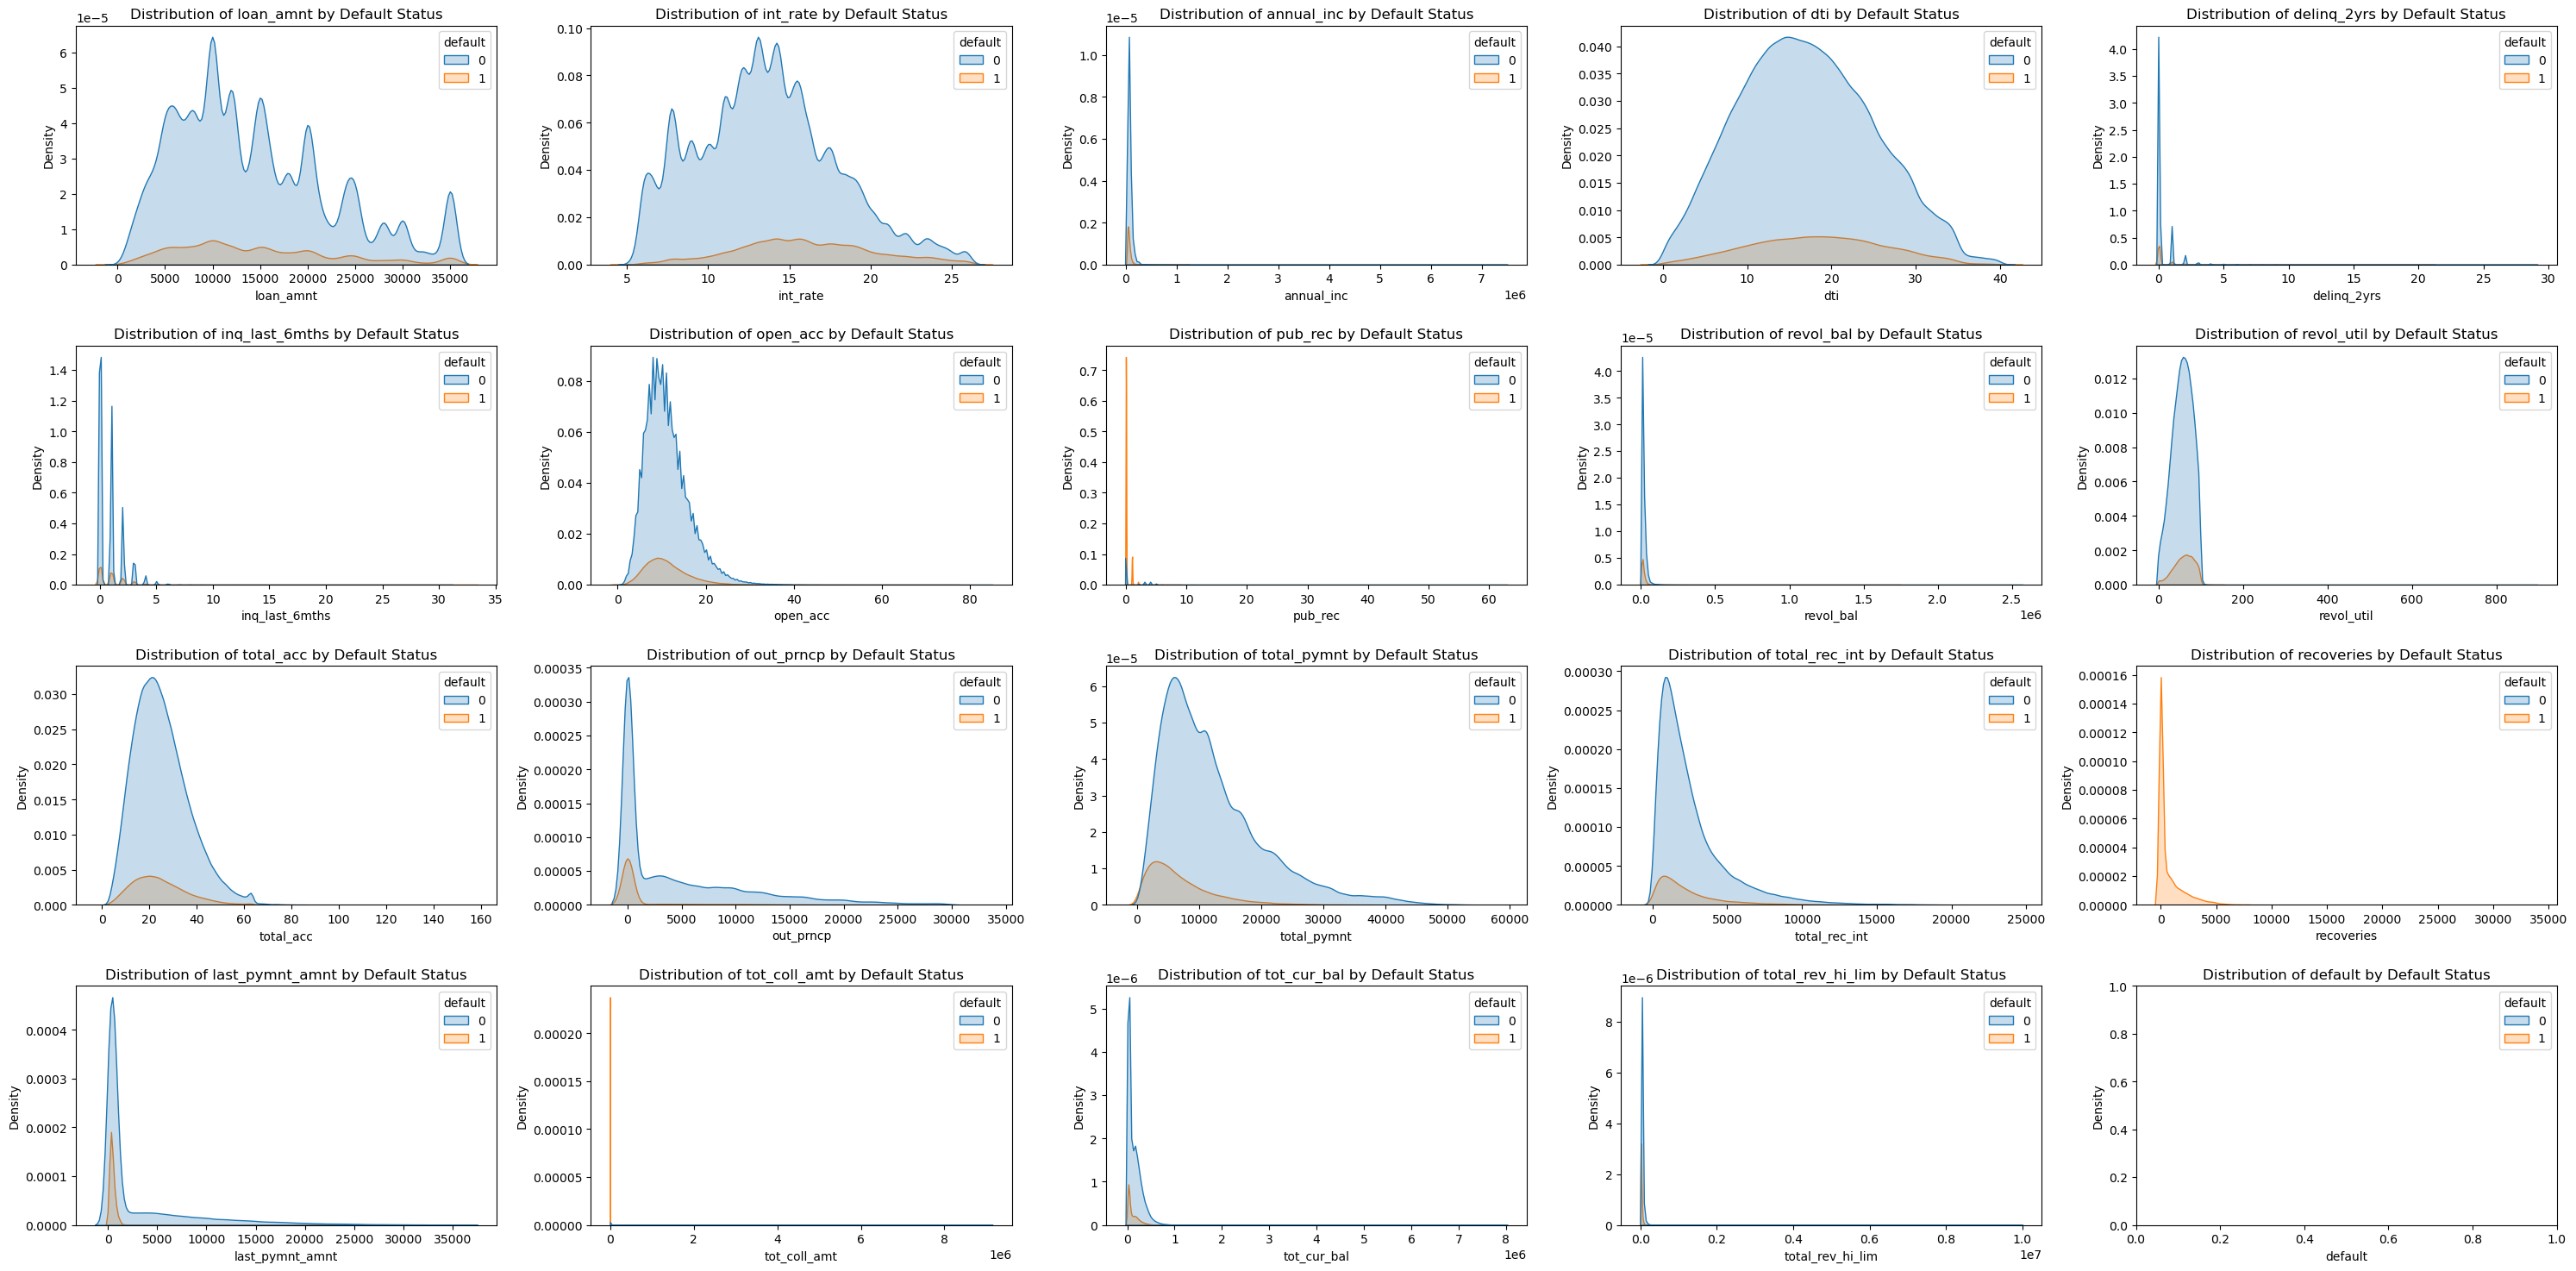

In [21]:
cols = numeric_cols[:20]
fig,ax = plt.subplots(4,5,figsize = (30,15))

for ax, col in zip(ax.flatten(), cols): 
    sns.kdeplot( data=numeric_df, x=col, hue='default', fill=True,ax = ax )
    ax.set_title(f"Distribution of {col} by Default Status")     
plt.tight_layout() 
plt.show()




=== annual_inc ===


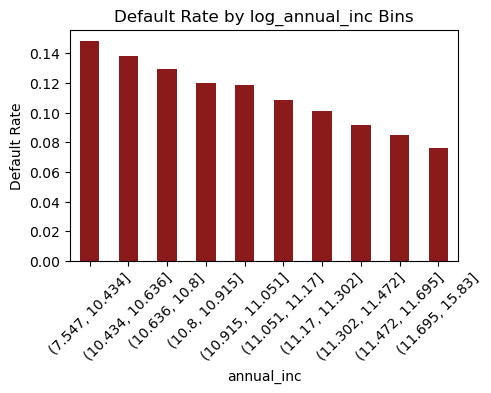


=== int_rate ===


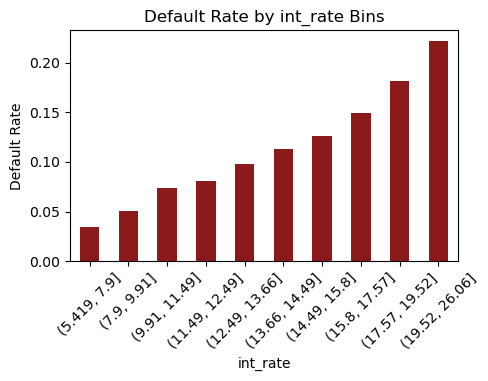


=== delinq_2yrs ===


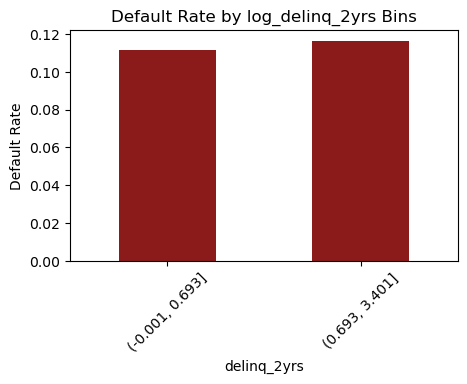


=== dti ===


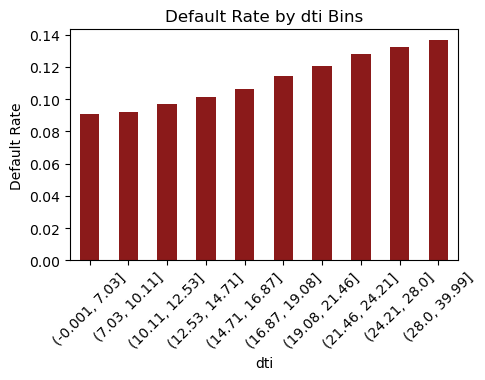


=== revol_util ===


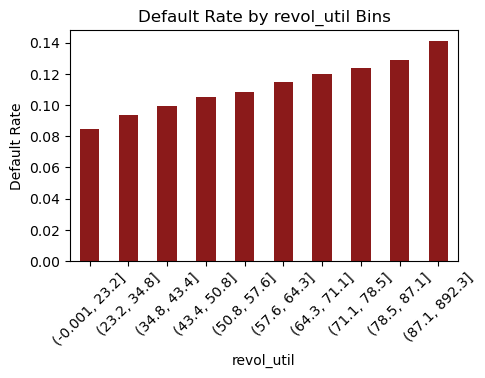


=== inq_last_6mths ===


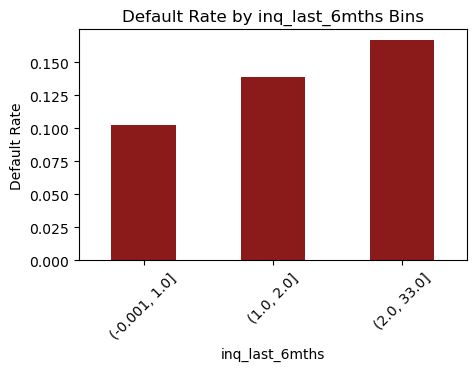


=== revol_bal ===


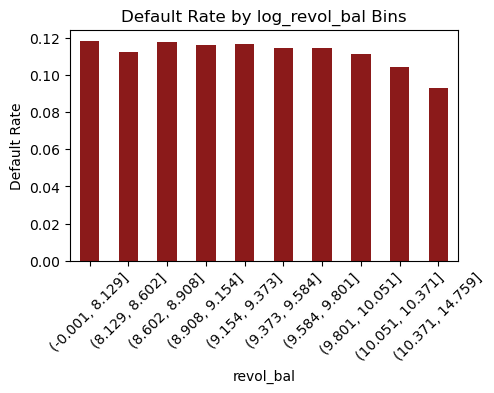

In [22]:
def plot_binned_default_rate(df,col,bins = 10):
    if df[col].skew() > 3:
        temp_col = f"log_{col}"
        df[temp_col] = np.log1p(df[col])
        use_col = temp_col
    else:
        use_col = col
    try: 
        df['bin'] = pd.qcut(df[use_col], q=bins, duplicates='drop')
    except:
        print(f"Skip {col}: cannot bin")
        return
    rate = df.groupby('bin')['default'].mean()
    plt.figure(figsize=(5, 3)) 
    rate.plot(kind='bar', color='#8B1A1A') 
    plt.title(f"Default Rate by {use_col} Bins") 
    plt.ylabel("Default Rate") 
    plt.xlabel(col) 
    plt.xticks(rotation=45) 
    plt.show()

binned_col = ['annual_inc','int_rate','delinq_2yrs','dti','revol_util','inq_last_6mths','revol_bal']
for col in binned_col: 
    if col != "default": 
        print(f"\n=== {col} ===") 
        plot_binned_default_rate(numeric_df, col)
        
    

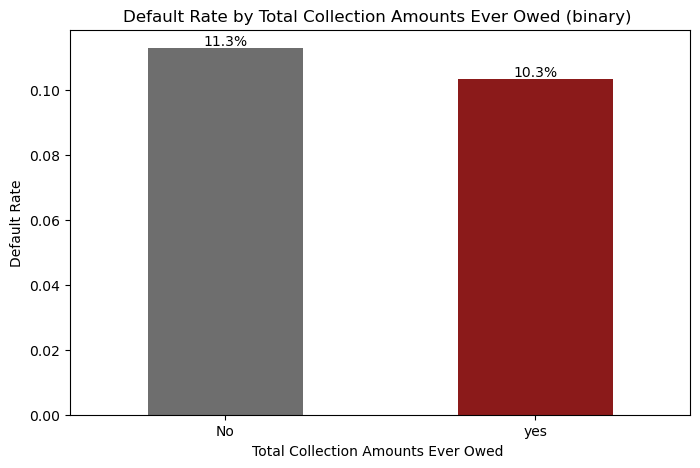

In [23]:
loan_data['tot_coll_amt_binary'] = (loan_data['tot_coll_amt']>0).astype(int)
# sns.countplot(data = numeric_df , x = 'tot_coll_amt_binary',hue = 'default' )
default_rate =loan_data.groupby('tot_coll_amt_binary')['default'].mean()
plt.figure(figsize=(8,5))
default_rate.plot(kind = 'bar',color=[ '#6E6E6E','#8B1A1A'])
for i, v in enumerate(default_rate):
        plt.text(i, v+0.002, f"{v:.1%}",ha= 'center',va = 'center',fontsize = 10)
plt.title('Default Rate by Total Collection Amounts Ever Owed (binary) ')

plt.xticks([0,1],['No','yes'],rotation = 0)
plt.xlabel('Total Collection Amounts Ever Owed ')
plt.ylabel('Default Rate')
plt.show()

In [24]:
cat_col=[]
cat_df = loan_data.select_dtypes('object')
cat_col = cat_df.columns.tolist()
print("=== Category Columns ===")
print(cat_col, "\n")
print('Category columns count :',cat_df.shape[1])

=== Category Columns ===
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 

Category columns count : 20


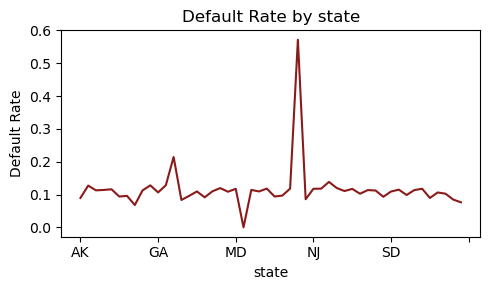

In [25]:



location_default_rate = loan_data.groupby('addr_state')['default'].mean()
plt.figure(figsize=(5,3))
location_default_rate.plot(kind = 'line',color ='#8B1A1A')

plt.title("Default Rate by state") 
plt.ylabel("Default Rate") 
plt.xlabel('state') 
plt.xticks(rotation=0) 
plt.tight_layout() 
plt.show()

    

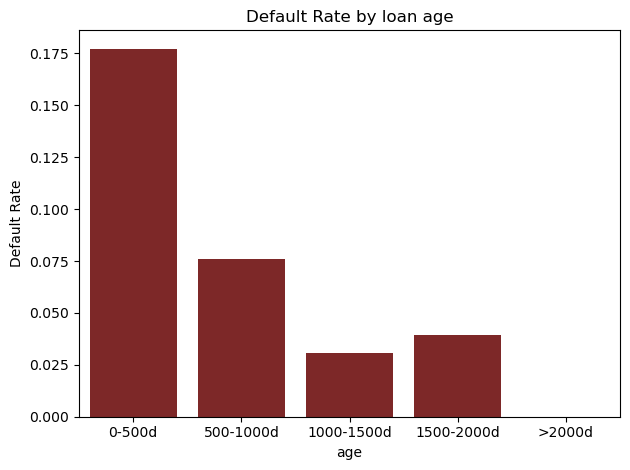

In [26]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['last_pymnt_d'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y')

loan_data['loan_age'] = (loan_data['last_pymnt_d']-loan_data['issue_d']).dt.days

bins = [0, 500, 1000, 1500,2000, loan_data['loan_age'].max()] 
labels = ['0-500d', '500-1000d', '1000-1500d', '1500-2000d', '>2000d'] 
loan_data['loan_age_bins'] = pd.cut(loan_data['loan_age'], bins=bins, labels=labels)
age_default_rate= loan_data.groupby('loan_age_bins')['default'].mean().reset_index()

sns.barplot(data = age_default_rate, x='loan_age_bins',y = 'default',color ='#8B1A1A' )
    
plt.title("Default Rate by loan age") 
plt.ylabel("Default Rate") 
plt.xlabel('age') 

plt.tight_layout() 
plt.show()

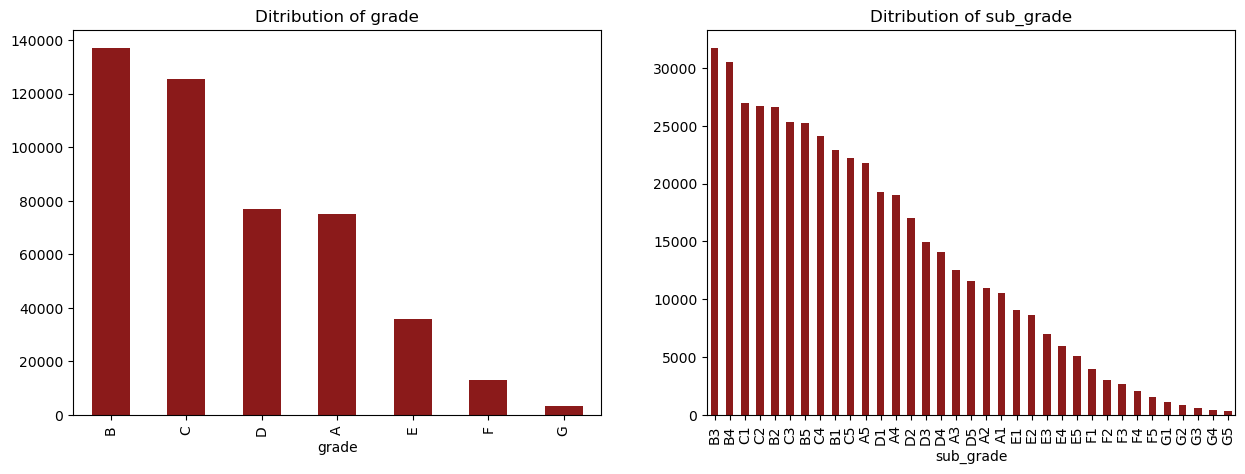

In [27]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
loan_data['grade'].value_counts().plot(kind = 'bar',ax = ax[0],color ='#8B1A1A')
ax[0].set_title('Ditribution of grade')
loan_data['sub_grade'].value_counts().plot(kind = 'bar',ax = ax[1],color ='#8B1A1A')
ax[1].set_title('Ditribution of sub_grade')
plt.show()


In [28]:
def combine_grade(row):
    if row['grade'] in ['A','B','C','D','E']:
        return row['sub_grade']
    else:
        return row['grade']
loan_data['grade_final']  = loan_data.apply(combine_grade,axis = 1)


In [29]:
# Home owenership
print(loan_data['home_ownership'].unique())
print(loan_data['emp_length'].unique())
print(loan_data['verification_status'].unique())
print(loan_data['addr_state'].unique())
print(loan_data['pymnt_plan'].unique())
print(loan_data['application_type'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['Verified' 'Source Verified' 'Not Verified']
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']
['n' 'y']
['INDIVIDUAL']


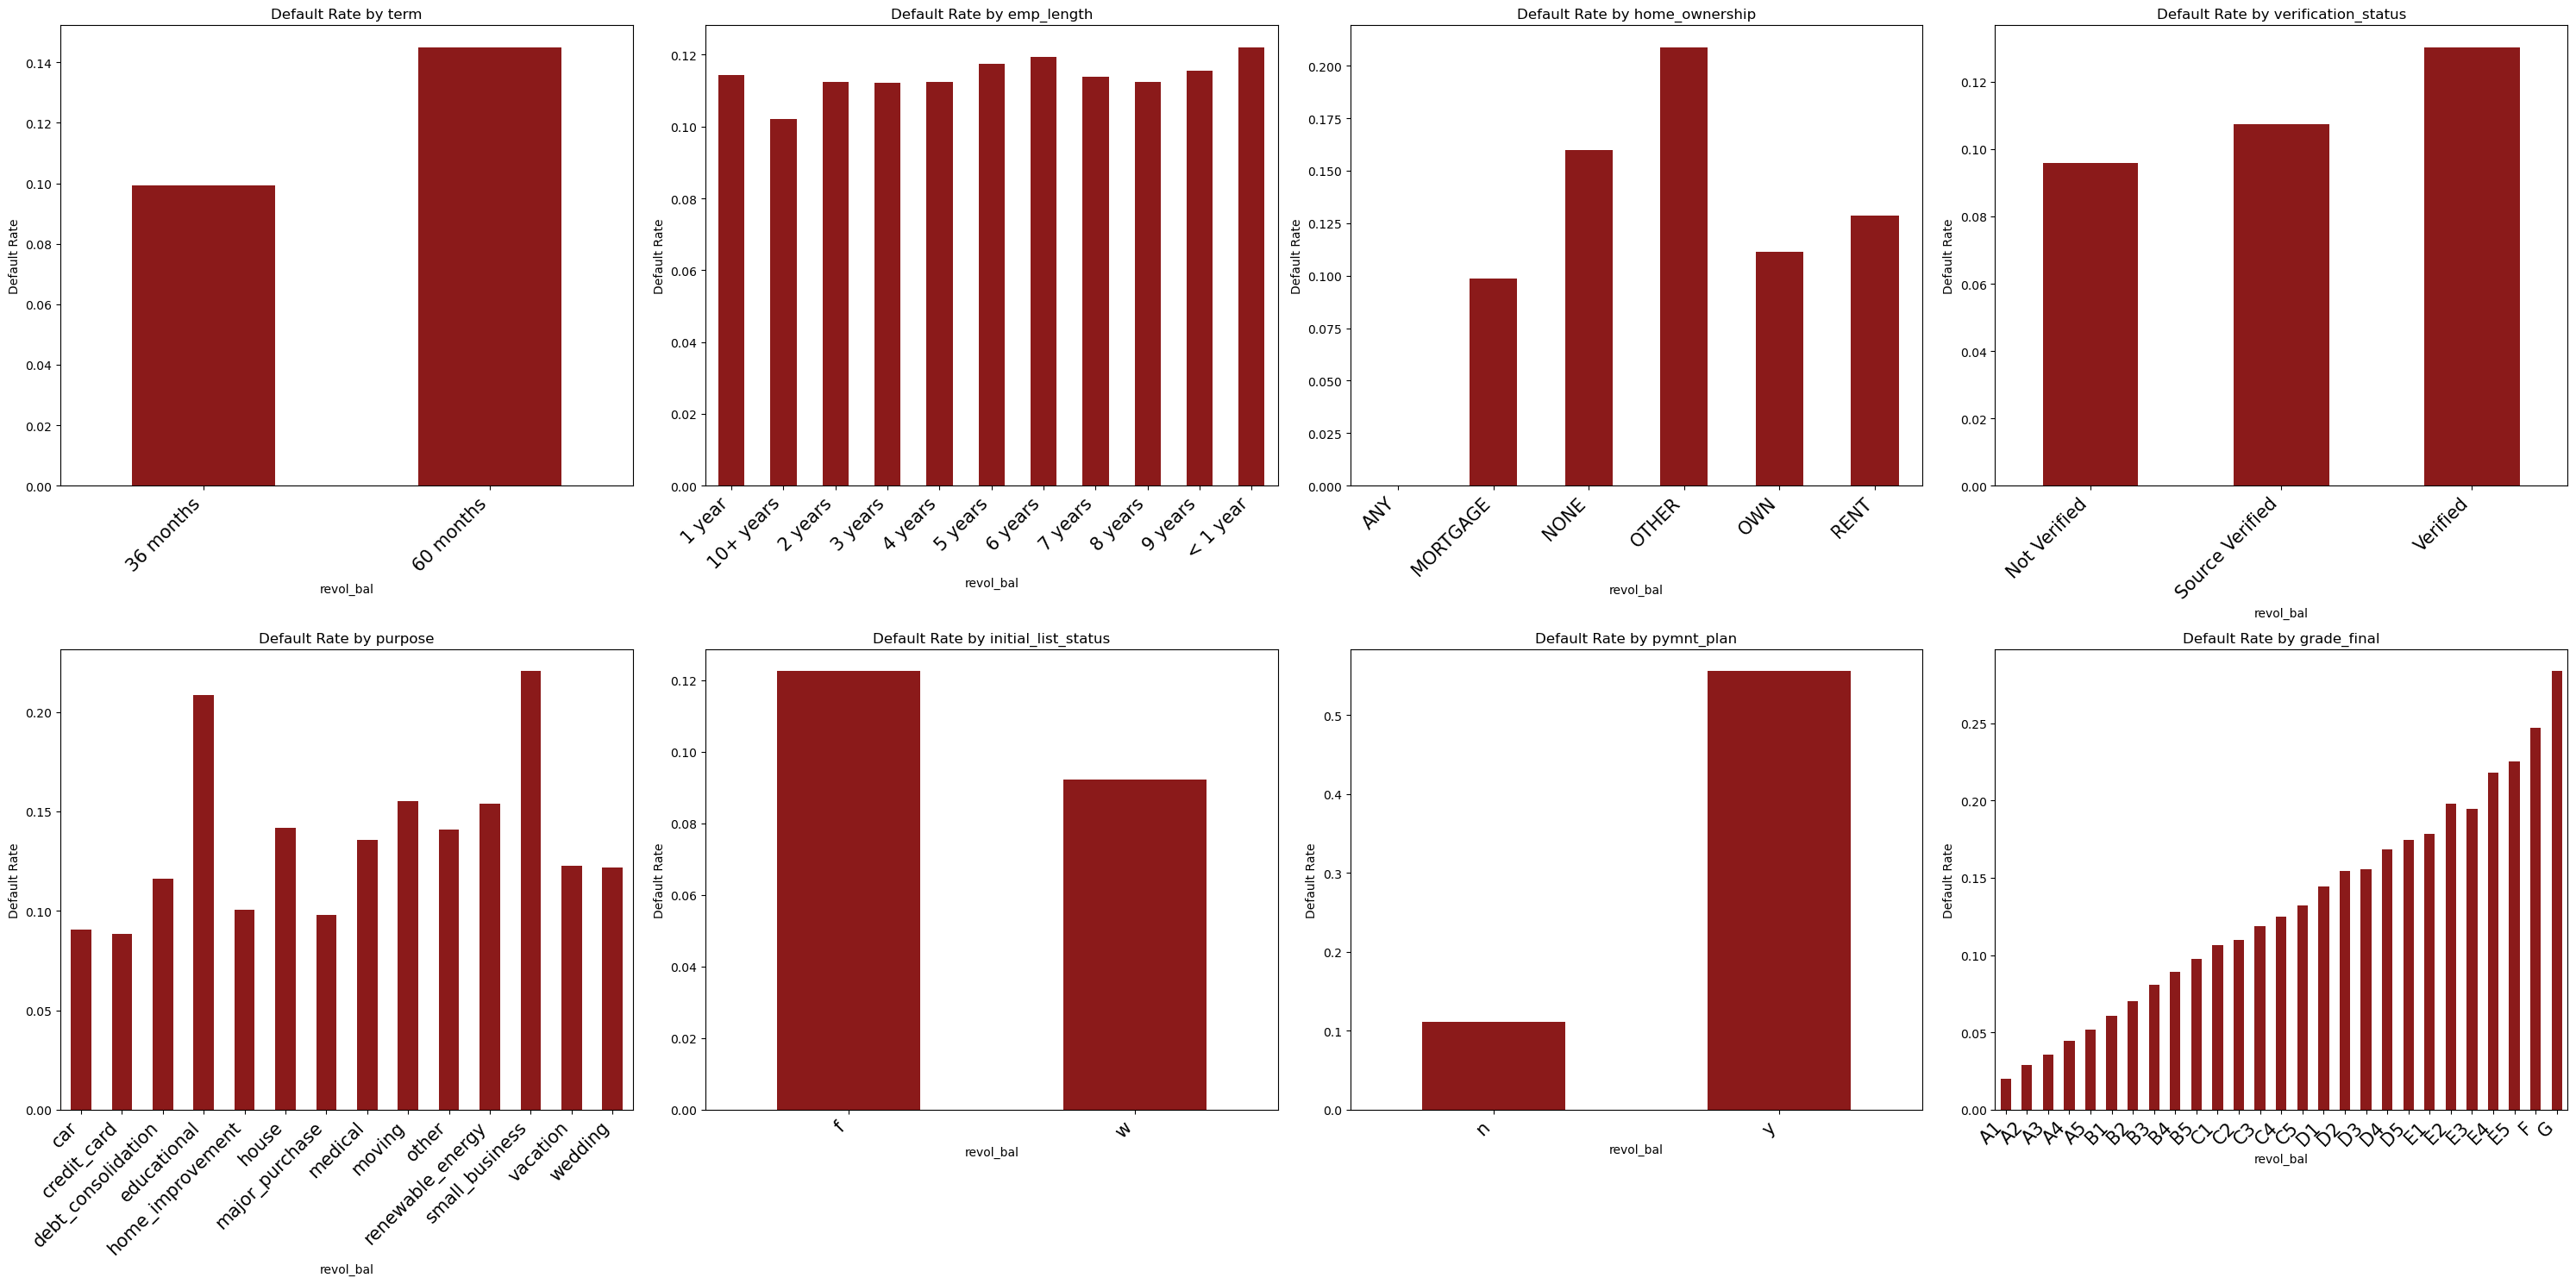

In [30]:
cols = ['term','emp_length', 'home_ownership', 'verification_status','purpose','initial_list_status','pymnt_plan','grade_final']

fig,axes = plt.subplots(2,4,figsize = (30,15))
axes = axes.flatten()
for i,v in enumerate(cols):
    ax = axes[i]
    default_rate = loan_data.groupby(v)['default'].mean()
    default_rate.plot(kind = 'bar', ax = ax, color ='#8B1A1A')
    ax.set_title(f'Default Rate by {v}')
    ax.set_ylabel("Default Rate") 
    ax.set_xlabel(f'{col}')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right',fontsize = 15)
plt.tight_layout()
plt.show()

In [31]:
# Data classify
num_col = [col for col in numeric_cols if col != 'default' ]
cat_col = ['term', 'grade','grade_final', 'emp_length', 'home_ownership', 'verification_status', 'loan_age', 'pymnt_plan', 'purpose',  'addr_state',  'initial_list_status'] 

X = loan_data[num_col + cat_col].copy()
y = numeric_df['default'].copy()

# Fill null value for num and cat
X = X.fillna(X.median(numeric_only = True))
X = X.fillna(X.mode().iloc[0])

X = pd.get_dummies(X, columns = cat_col, drop_first=True)
print(X.shape)
print(X.columns.tolist())

(466285, 389)
['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'recoveries', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'grade_final_A2', 'grade_final_A3', 'grade_final_A4', 'grade_final_A5', 'grade_final_B1', 'grade_final_B2', 'grade_final_B3', 'grade_final_B4', 'grade_final_B5', 'grade_final_C1', 'grade_final_C2', 'grade_final_C3', 'grade_final_C4', 'grade_final_C5', 'grade_final_D1', 'grade_final_D2', 'grade_final_D3', 'grade_final_D4', 'grade_final_D5', 'grade_final_E1', 'grade_final_E2', 'grade_final_E3', 'grade_final_E4', 'grade_final_E5', 'grade_final_F', 'grade_final_G', 'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years', 'emp_le

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [33]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)
print('X_train:', X_train.shape[0])
print('X_test:', X_test.shape[0])
print('y_train_mean:',y_train.mean())
print('y_test_mean:',y_test.mean())

X_train: 373028
X_test: 93257
y_train_mean: 0.11191921249879365
y_test_mean: 0.11191653173488317


In [38]:
# Logistic Regression Model 
LR_model = LogisticRegression(
    random_state = 42,
    max_iter = 1000,
    class_weight = 'balanced',
    verbose = 2 
)
LR_model.fit(X_train , y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   verbose=2)

In [41]:
y_pred = LR_model.predict(X_test)
y_pred_proba = LR_model.predict_proba(X_test)

In [47]:
#Accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f'Accurancy score:{accuracy}')

Accurancy score:0.9757444481379414


In [70]:
# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(f'\n Confusion Matrix : \n {cm}')
tn, fp, fn, tp = cm.ravel()
print(f'\n TN: {tn}\n FP: {fp}\n FN: {fn}\n TP: {tp} \n')


 Confusion Matrix : 
 [[82339   481]
 [ 1781  8656]]

 TN: 82339
 FP: 481
 FN: 1781
 TP: 8656 



In [72]:
# sensitivity/ specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'\n sensitivity : {sensitivity}\n specificity  : {specificity }\n')


 sensitivity : 0.8293570949506563
 specificity  : 0.9941922241004588



In [73]:
# precision
precision = tp / (tp + fp)
print(f' precision : {precision}')

 precision : 0.947356900514392


In [74]:
#AUC-ROC
auc = roc_auc_score(y_test,y_pred_proba[:,1])
print(f' AUC-ROC: {auc}')

 AUC-ROC: 0.9572467636628987


In [75]:
#Classified report
print(classification_report(y_test,y_pred,target_names = ['defauly','undefault']))

              precision    recall  f1-score   support

     defauly       0.98      0.99      0.99     82820
   undefault       0.95      0.83      0.88     10437

    accuracy                           0.98     93257
   macro avg       0.96      0.91      0.94     93257
weighted avg       0.98      0.98      0.98     93257



In [88]:
# Top 15 Feature
coef_df = pd.DataFrame({
    'features': X.columns,
    'coeffcients': LR_model.coef_[0]
})
coef_df['ABS'] = np.abs(coef_df['coeffcients'])
coef_df = coef_df.sort_values('ABS',ascending = False)
print(f'\n Top 15 Features :\n {coef_df.head(15)}')


 Top 15 Features :
                   features  coeffcients       ABS
14              recoveries     0.049854  0.049854
9               revol_util    -0.009615  0.009615
3                      dti    -0.003311  0.003311
10               total_acc    -0.002606  0.002606
13           total_rec_int     0.001557  0.001557
12             total_pymnt    -0.001465  0.001465
0                loan_amnt     0.001363  0.001363
11               out_prncp    -0.001306  0.001306
6                 open_acc    -0.000842  0.000842
1                 int_rate    -0.000811  0.000811
15         last_pymnt_amnt    -0.000659  0.000659
5           inq_last_6mths     0.000296  0.000296
19         term_ 60 months    -0.000279  0.000279
388  initial_list_status_w    -0.000196  0.000196
128         loan_age_457.0    -0.000161  0.000161


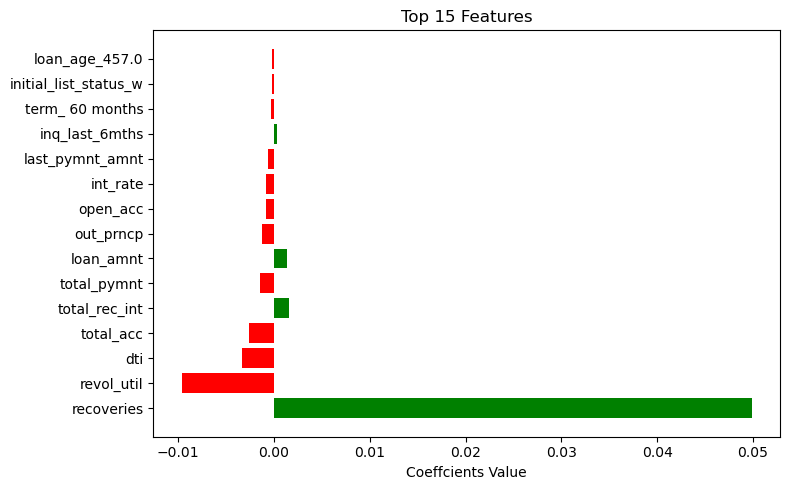

In [127]:
fig,ax = plt.subplots(figsize = (8,5))
top_features = coef_df.head(15)
colors = ['red' if x < 0 else 'green' for x in top_features['coeffcients']]
ax.barh(top_features['features'],top_features['coeffcients'],color = colors)
ax.set_xlabel('Coeffcients Value')
ax.set_title('Top 15 Features')
plt.tight_layout()

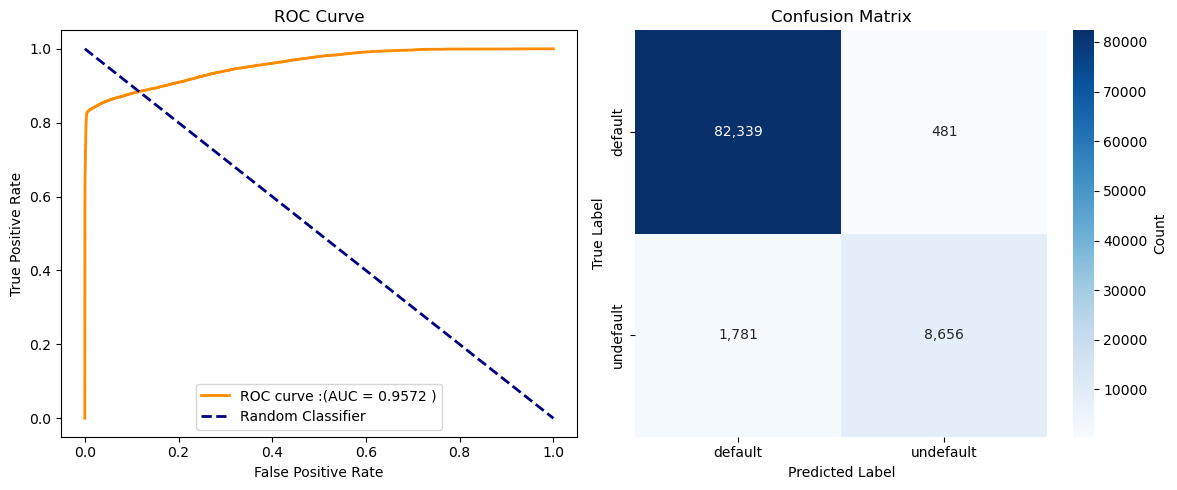

In [162]:
# ROC curve
fpr, tpr , _ = roc_curve(y_test,y_pred_proba[:,1])
fig,ax = plt.subplots(1,2, figsize = (12,5))

ax[0].plot(fpr, tpr ,color = 'darkorange', lw = 2 , label = f'ROC curve :(AUC = {auc:.4f} )')
ax[0].plot([0,1],[1,0],color = 'navy',lw = 2, linestyle = '--',label = 'Random Classifier')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve')
ax[0].legend()
sns.heatmap(cm, annot = True,fmt=',d', cmap = 'Blues',ax = ax[1],
            xticklabels = ['default','undefault'],
            yticklabels = ['default','undefault'],
            cbar_kws={'label': 'Count'}
           )
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')
ax[1].set_title('Confusion Matrix')
plt.tight_layout()
plt.show()